In [1]:
import pandas as pd
import numpy as np
from pandas import Series as sr, DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns
#style.use('seaborn')
%matplotlib inline

In [2]:
data = pd.read_csv("../data.txt", sep = ' ', header = None)
data.head()


,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [27]:
data_column_names = ["Date", "Time", "Epoch", "Moteid", "Temperature", "Humidity", "Light", "Voltage"]
dplot = pd.read_csv("../data.txt", sep = ' ', names = data_column_names)
dplot.shape

(2313682, 8)

In [3]:
data = data[data[3]==7.0]
data.head()

,0,1,2,3,4,5,6,7
216090,2004-02-28,01:05:16.649448,15,7.0,19.4298,38.9401,108.56,2.68742
216091,2004-02-28,01:05:46.546353,16,7.0,19.4200,39.0763,104.88,2.67532
216092,2004-02-28,01:06:16.766558,17,7.0,19.4298,39.1443,104.88,2.68742
216093,2004-02-28,01:06:46.58428,18,7.0,19.4200,39.2123,104.88,2.68742
216094,2004-02-28,01:07:16.511303,19,7.0,19.4200,39.2803,104.88,2.68742


In [4]:
# print(S1df.shape)
outliersIListaS1 = []
outliersIListaVS1 = []
for i, row in data.iterrows():
    if row[4] >=26.2 :
        outliersIListaS1.append(i)
        outliersIListaVS1.append(row[4])
print(data.shape, len(outliersIListaS1))


(55361, 8) 12481


In [5]:
# Removendo outliers no S1
passo3S1= data.copy()
print(passo3S1.head())
print(passo3S1.shape)

                 0                1   2    3        4        5       6  \
216090  2004-02-28  01:05:16.649448  15  7.0  19.4298  38.9401  108.56   
216091  2004-02-28  01:05:46.546353  16  7.0  19.4200  39.0763  104.88   
216092  2004-02-28  01:06:16.766558  17  7.0  19.4298  39.1443  104.88   
216093  2004-02-28   01:06:46.58428  18  7.0  19.4200  39.2123  104.88   
216094  2004-02-28  01:07:16.511303  19  7.0  19.4200  39.2803  104.88   

              7  
216090  2.68742  
216091  2.67532  
216092  2.68742  
216093  2.68742  
216094  2.68742  
(55361, 8)


In [6]:
passo3S1= passo3S1.drop(outliersIListaS1)
print(passo3S1.shape)
passo3S1.to_csv('S7macc.csv')

(42880, 8)


In [7]:
data = pd.read_csv("S7macc.csv")
data.shape

(42880, 9)

In [8]:
data.drop(['Unnamed: 0'], axis=1,inplace=True)
data.head(1)

,0,1,2,3,4,5,6,7
0,2004-02-28,01:05:16.649448,15,7.0,19.4298,38.9401,108.56,2.68742


In [10]:
for key,d in data[:data.shape[0]].groupby('3'):
    print(key,"\n",d.head())
    print("--------------------------------")

7.0 
             0                1   2    3        4        5       6        7
0  2004-02-28  01:05:16.649448  15  7.0  19.4298  38.9401  108.56  2.68742
1  2004-02-28  01:05:46.546353  16  7.0  19.4200  39.0763  104.88  2.67532
2  2004-02-28  01:06:16.766558  17  7.0  19.4298  39.1443  104.88  2.68742
3  2004-02-28   01:06:46.58428  18  7.0  19.4200  39.2123  104.88  2.68742
4  2004-02-28  01:07:16.511303  19  7.0  19.4200  39.2803  104.88  2.68742
--------------------------------


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42880 entries, 0 to 42879
Data columns (total 8 columns):
0    42880 non-null object
1    42880 non-null object
2    42880 non-null int64
3    42880 non-null float64
4    42873 non-null float64
5    42873 non-null float64
6    42873 non-null float64
7    42880 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 2.6+ MB


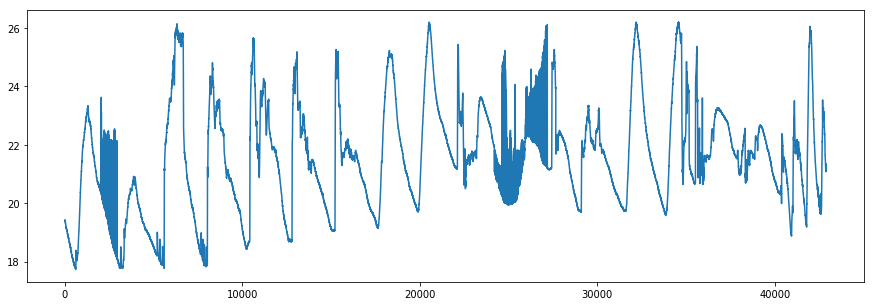

In [13]:
plt.figure(figsize = (15,5))
data[:data.shape[0]]['4'].plot()

In [15]:
for key, d in data[:data.shape[0]].groupby('3'):
    break
    d.head()

In [16]:
data.shape, d.shape

((42880, 8), (42880, 8))

In [17]:
d = d.sort_values(['0','1'],ascending = [1,1])

In [30]:
d.shape, (d.tail())

((42880, 8),
                 0                1      2    3   4   5   6        7
 41455  2004-04-01  12:11:23.007721  59910  7.0 NaN NaN NaN  2.18353
 41456  2004-04-01  12:12:18.540529  59912  7.0 NaN NaN NaN  2.18353
 41459  2004-04-01  12:14:00.173087  59915  7.0 NaN NaN NaN  2.18353
 41461  2004-04-01  12:17:24.485934  59922  7.0 NaN NaN NaN  2.18353
 41804  2004-04-01  23:54:27.768052  61318  7.0 NaN NaN NaN  2.15188)

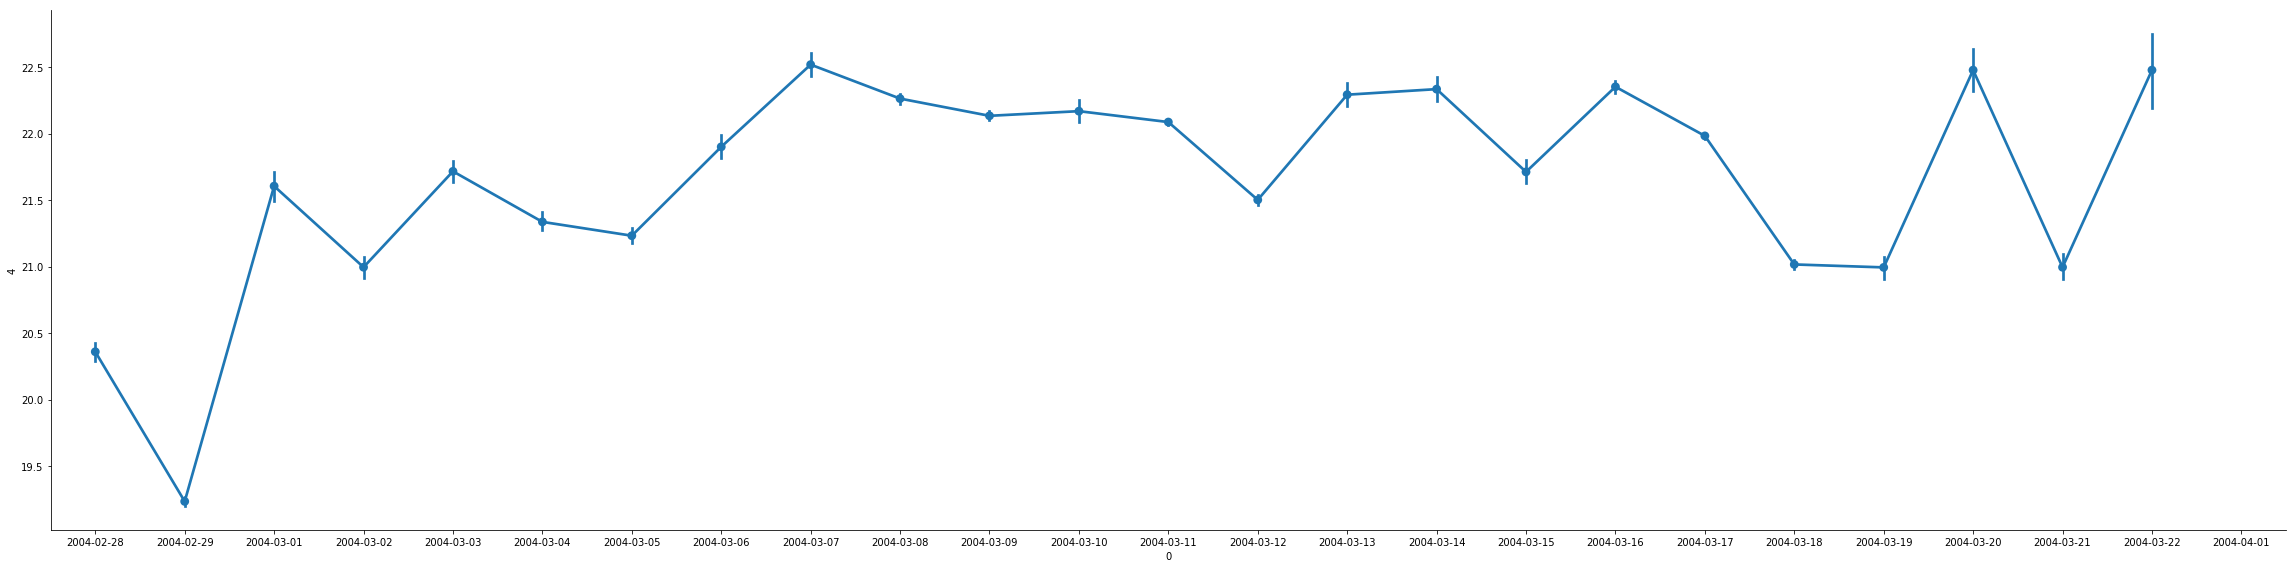

In [19]:
#plt.figure(figsize = (20,2))
sns.factorplot(x='0', y = '4', data = d, size = 8, aspect = 4)

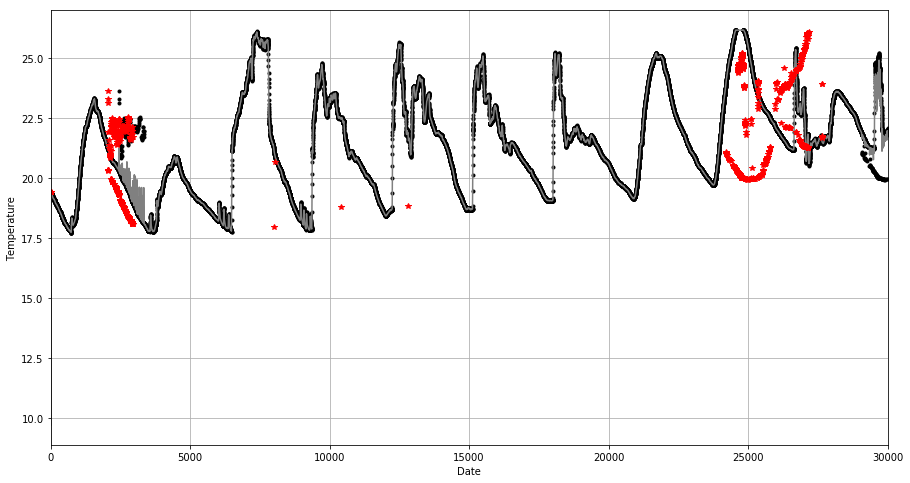

In [31]:
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
#style.use('fivethirtyeight')
%matplotlib inline
def moving_average(data, window_size):

    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(data, window, 'same')


def explain_anomalies(y, window_size, sigma=1.0):

    avg = moving_average(y, window_size).tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    std = np.std(residual)
    return {'standard_deviation': round(std, 2),
            'anomalies_dict': collections.OrderedDict([(index, y_i) for
                                                       index, y_i, avg_i in zip(count(), y, avg)
              if (y_i > avg_i + (sigma*std)) | (y_i < avg_i - (sigma*std))])}


def explain_anomalies_rolling_std(y, window_size, sigma=1.0):
    """ Helps in exploring the anamolies using rolling standard deviation
    Args:
    -----
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma (int): value for standard deviation

    Returns:
    --------
        a dict (dict of 'standard_deviation': int, 'anomalies_dict': (index: value))
        containing information about the points indentified as anomalies
    """
    avg = moving_average(y, window_size)
    avg_list = avg.tolist()
    residual = y - avg
    # Calculate the variation in the distribution of the residual
    testing_std = pd.rolling_std(residual, window_size)
    testing_std_as_df = pd.DataFrame(testing_std)
    rolling_std = testing_std_as_df.replace(np.nan,
                                  testing_std_as_df.ix[window_size - 1]).round(3).iloc[:,0].tolist()
    std = np.std(residual)
    return {'stationary standard_deviation': round(std, 3),
            'anomalies_dict': collections.OrderedDict([(index, y_i)
                                                       for index, y_i, avg_i, rs_i in izip(count(),
                                                                                           y, avg_list, rolling_std)
              if (y_i > avg_i + (sigma * rs_i)) | (y_i < avg_i - (sigma * rs_i))])}


# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
    plt.plot(x_anomaly, y_anomaly, "r*")
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()

# This function is repsonsible for displaying how the function performs on the given dataset.
def plot_results2(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='gray')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    if applying_rolling_std:
        events = explain_anomalies_rolling_std(y, window_size=window_size, sigma=sigma_value)
    else:
        events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, )
    #print(x_anomaly)

    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()


# 4. Lets play with the functions
x = data[:data.shape[0]]['2']
Y = data[:data.shape[0]]['4']

# plot the results
plot_results(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")
#events = explain_anomalies(y=Y, window_size=5, sigma=3)

# Display the anomaly dict
#print("Information about the anomalies model:{}".format(events))


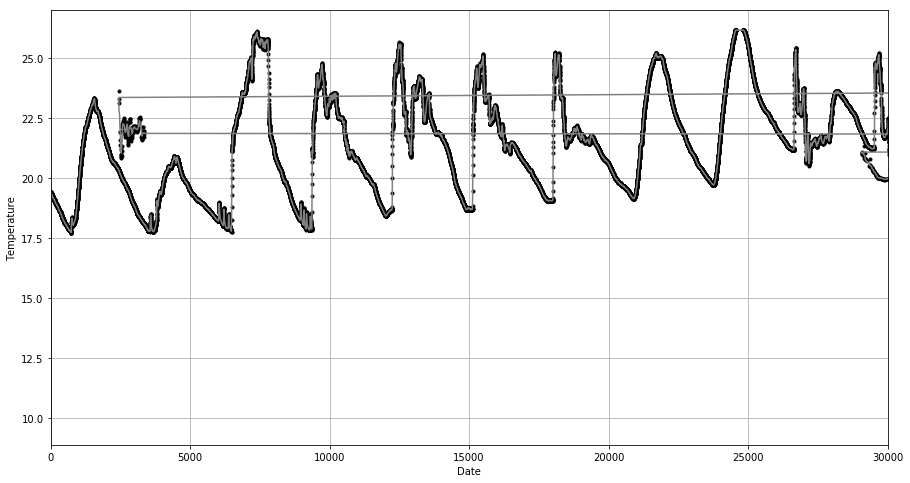

In [32]:

# 4. Lets play with the functions
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']

# plot the results
plot_results2(x, y=Y, window_size=10, text_xlabel="Date", sigma_value=2,text_ylabel="Temperature")


In [33]:
def final_results(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    y_av = moving_average(y, window_size)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))
    return x_anomaly

# 4. Lets play with the functions
x = d[:d.shape[0]]['2']
Y = d[:d.shape[0]]['4']
# Pegando os índices dos outliers e removendo do dataset final
outliersIndices = final_results(x, y=Y, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")
outliersIndices

351


array([    0,     1,     2,     3,     4,  3216,  3217,  5464,  5465,
        5466,  5467,  5469,  5470,  5471,  5472,  5473,  5474,  5475,
        5476,  5477,  6415,  6543,  6548,  6551,  6552,  6553,  6554,
        6555,  7641,  7642,  7644,  7645,  7646,  7898,  7899,  7900,
        7901,  7902,  7903,  7904,  7905,  7906,  7907,  7908,  7909,
        7921,  8832,  8833,  8838,  8841,  8889,  8900,  8913,  8926,
        8930,  8931,  8949,  8952, 10290, 10291, 10292, 10293, 10295,
       10296, 10297, 10298, 10299, 10300, 10301, 10322, 12670, 12671,
       12672, 12674, 12675, 12676, 12677, 12678, 12679, 12680, 12681,
       12807, 12808, 15091, 15092, 15093, 15094, 15095, 15096, 15097,
       15098, 15100, 15102, 15103, 15104, 15114, 21990, 21991, 21992,
       21995, 21996, 21997, 21998, 22000, 22001, 22002, 22003, 22431,
       22433, 24460, 24461, 24462, 24464, 24465, 24466, 24467, 24468,
       24469, 24899, 24902, 24947, 24956, 24960, 25107, 25120, 25121,
       25122, 25123,

In [34]:
## Checando e removendo outliers no step 3.
passoO= d[:d.shape[0]].copy()
print(passoO.shape)
passoO= passoO.drop(passoO.index[outliersIndices])
print(passoO.shape)

(42880, 8)
(42529, 8)


351


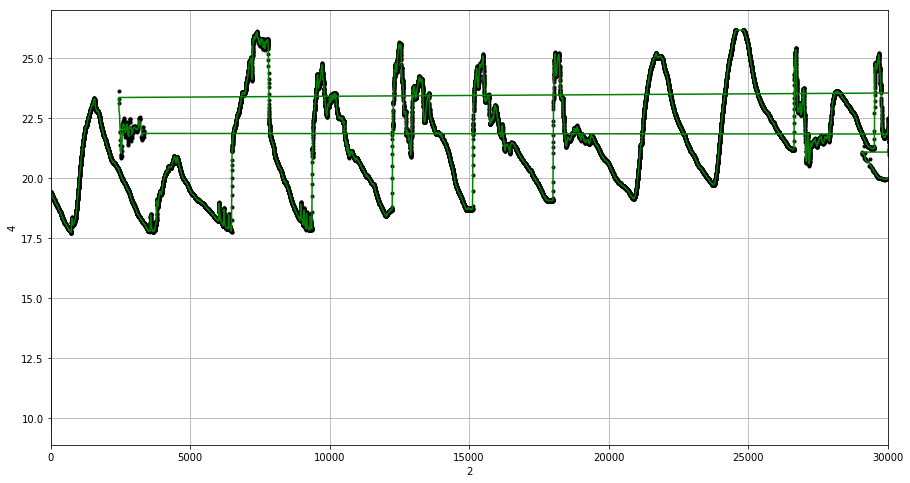

In [35]:
def plot_resultsFinal(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()  
def plot_resultsAOR(x, y, window_size, sigma_value=1,
                 text_xlabel="X Axis", text_ylabel="Y Axis", applying_rolling_std=False):
    """ Helps in generating the plot and flagging the anamolies.
        Supports both moving and stationary standard deviation. Use the 'applying_rolling_std' to switch
        between the two.
    Args:
    -----
        x (pandas.Series): dependent variable
        y (pandas.Series): independent variable
        window_size (int): rolling window size
        sigma_value (int): value for standard deviation
        text_xlabel (str): label for annotating the X Axis
        text_ylabel (str): label for annotatin the Y Axis
        applying_rolling_std (boolean): True/False for using rolling vs stationary standard deviation
    """
    plt.figure(figsize=(15, 8))
    plt.plot(x, y, "k.")
    y_av = moving_average(y, window_size)
    plt.plot(x, y_av, color='green')
    plt.xlim(0, 30000)
    plt.xlabel(text_xlabel)
    plt.ylabel(text_ylabel)

    # Query for the anomalies and plot the same
    events = {}
    events = explain_anomalies(y, window_size=window_size, sigma=sigma_value)

    
    
    x_anomaly = np.fromiter(events['anomalies_dict'].keys(), dtype=int, count=len(events['anomalies_dict']))
    y_anomaly = np.fromiter(events['anomalies_dict'].values(), dtype=float,
                                            count=len(events['anomalies_dict']))
#     plt.plot(x_anomaly, y_anomaly, "r*")
# #     print(len(x_anomaly), x_anomaly)
    print(len(x_anomaly))

    
    # add grid and lines and enable the plot
    plt.grid(True)
    plt.show()   
# Step 3 COmplete Antes de remover outliers

xF = d[:d.shape[0]]['2']
YF = d[:d.shape[0]]['4']

# plot residual
plot_resultsAOR(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")

# Depois de ter os dados reconstruídos - verificamos a sério temporal

5042


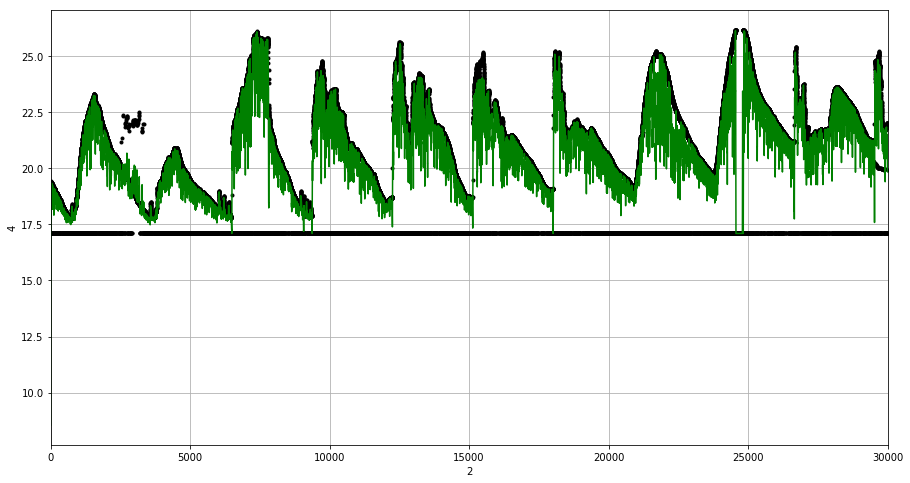

In [63]:
# Final reconstrução - passo 3 # Executar depois de gerar o dataframe teste no scrip do sensor
xF = teste['2']
YF = teste['4']

# plot final rec
plot_resultsFinal(xF, y=YF, window_size=10, text_xlabel="2", sigma_value=2,text_ylabel="4")


# Estatísticas Simples

In [38]:
dplot[dplot['Moteid']==7].shape

(55361, 8)

In [39]:
# Passo 0
myDicInit = {
    'Data type':['Raw Data'],
    'size':[dplot[dplot['Moteid']==7].shape[0]], # Pegamos o shape dos dados brutos de dplot para cada sensor
    'mean':dplot[dplot['Moteid']==7][:dplot.shape[0]]['Temperature'].mean(),
    'SD':dplot[dplot['Moteid']==7][:dplot.shape[0]]['Temperature'].std(), 
    'median':dplot[dplot['Moteid']==7][:dplot.shape[0]]['Temperature'].median(),
    'MAD':dplot[dplot['Moteid']==7][:dplot.shape[0]]['Temperature'].mad()  
}

df0 = pd.DataFrame(myDicInit)
df0.head()


,Data type,size,mean,SD,median,MAD
0,Raw Data,55361,41.937863,39.674927,22.1052,31.879996


In [40]:

# Passo 1

myDic = {
    'Data type':['step 1 (BOR)'],
    'size':[d.shape[0]], # d.shape[0] sensor
    'mean':d[:d.shape[0]]['4'].mean(),
    'SD':d[:d.shape[0]]['4'].std(), 
    'median':d[:d.shape[0]]['4'].median(),
    'MAD':d[:d.shape[0]]['4'].mad()  
}

df = pd.DataFrame(myDic)
df.head()


,Data type,size,mean,SD,median,MAD
0,step 1 (BOR),42880,21.587396,1.833245,21.5956,1.425963


In [62]:
passoO.shape

(30941, 8)

In [41]:
# Passo 2

myDicResidualRemoved = {
    'Data type':['step 2 (AOR'],
    'size':[passoO.shape[0]],
    'mean':passoO['4'].mean(),
    'SD':passoO['4'].std(), 
    'median':passoO['4'].median(),
    'MAD':passoO['4'].mad()  
}

dfResAOR = pd.DataFrame(myDicResidualRemoved)
print(passoO.shape[0])
dfResAOR.head()

42529


,Data type,size,mean,SD,median,MAD
0,step 2 (AOR,42529,21.585565,1.834918,21.5956,1.427399


# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip sx_sy_sz-FI 

In [61]:
# Passo 3 - Esse passo é feito depois de ser gerado pelo scrip s2_s1_s3-FI 

myDicFinalImputation = {
    'Data type':['step 3'],
    'size':[teste.shape[0]],
    'mean':teste['4'].mean(),
    'SD':teste['4'].std(), 
    'median':teste['4'].median(),
    'MAD':teste['4'].mad()  
}

dfFinalI = pd.DataFrame(myDicFinalImputation)
print(teste.shape[0])
dfFinalI.head()

65536


,Data type,size,mean,SD,median,MAD
0,step 3,65536,19.997151,2.602306,20.1648,2.294049


In [62]:
print( df0.head() )
print( df.head() )
print( dfResAOR.head() )
print( dfFinalI.head() )


  Data type   size       mean         SD   median        MAD
0  Raw Data  55361  41.937863  39.674927  22.1052  31.879996
      Data type   size       mean        SD   median       MAD
0  step 1 (BOR)  42880  21.587396  1.833245  21.5956  1.425963
     Data type   size       mean        SD   median       MAD
0  step 2 (AOR  42529  21.585565  1.834918  21.5956  1.427399
  Data type   size       mean        SD   median       MAD
0    step 3  65536  19.997151  2.602306  20.1648  2.294049


##  Etapa para reconstruir as Épocas que estão faltando

In [43]:
indiceImput = []
for i in range(65536):
    indiceImput.append(i)
np.max(indiceImput)

65535

In [44]:
passoOEp = passoO['2'].tolist()
len(passoOEp)

42529

In [45]:
idInputEq = set(indiceImput)
idInputNEq = set(passoOEp)
resultIntersecEp = list( idInputEq - idInputNEq )

print(len(resultIntersecEp)) # {4, 6, 10}

print(len(idInputEq), len(idInputNEq))
# print('min max ',np.min(idInputEq), np.max(idInputNEq) )    

23183
65536 42353


In [46]:
# Create a time series of 2000 elements, one very five minutes starting on 1/1/2000
time = pd.date_range('2004-02-28', periods=65536, freq='31s')

# Create a pandas series with a random values between 0 and 100, using 'time' as the index
series = pd.Series(np.random.randint(100, size=65536), index=time)
# View the first few rows of the data
series[0:3]

2004-02-28 00:00:00    14
2004-02-28 00:00:31    11
2004-02-28 00:01:02     1
Freq: 31S, dtype: int32

In [47]:
# dfHora = series.to
dfHora  =pd.DataFrame(series, columns=['1'])

data.shape, type( len(resultIntersecEp) ), dfHora.head(1)

((42880, 8), int,              1
 2004-02-28  14)

In [49]:
# tamanho resultIntersecEp # CSV das épocas faltantes
listofzeros = [0] * len(resultIntersecEp)

#len(resultIntersecEp)
myDicNewdf2 = {
    '0':dplot[:len(resultIntersecEp)]['Date'],
    '1':dplot[:len(resultIntersecEp)]['Time'],#data[:32828]['1']
    '2':resultIntersecEp[:len(resultIntersecEp)],
    '3':dplot[:len(resultIntersecEp)]['Moteid'], 
    '4':listofzeros,
    '5':dplot[:len(resultIntersecEp)]['Humidity'],
    '6':dplot[:len(resultIntersecEp)]['Light'],
    '7':dplot[:len(resultIntersecEp)]['Voltage']  
}

dfOut = pd.DataFrame(myDicNewdf2)
print(dfOut.shape[0])
dfOut.to_csv('csvAllOutliers.csv', index=False)
dfOut.tail(10)


23183


,0,1,2,3,4,5,6,7
23173,2004-03-23,13:55:17.047256,65519,1.0,0,47.0486,309.12,2.30202
23174,2004-03-23,13:55:30.773897,65521,1.0,0,47.1467,309.12,2.30202
23175,2004-03-23,13:57:02.092828,65522,1.0,0,47.1140,309.12,2.30202
23176,2004-03-23,13:57:40.888111,65523,1.0,0,47.2120,309.12,2.30202
23177,2004-03-23,13:58:03.238867,65526,1.0,0,47.1467,309.12,2.30202
23178,2004-03-23,13:58:29.762019,65527,1.0,0,47.1793,294.40,2.30202
23179,2004-03-23,13:59:00.821978,65528,1.0,0,47.1467,294.40,2.30202
23180,2004-03-23,14:00:00.068758,65529,1.0,0,47.2120,294.40,2.30202
23181,2004-03-23,14:00:53.137484,65532,1.0,0,47.2120,294.40,2.30202
23182,2004-03-23,14:01:19.115569,65535,1.0,0,47.2120,294.40,2.30202


# Gerando o csv para fazer reconstrução dos dados

In [55]:
# Gerando o csv para fazer reconstrução dos dados
dfFinalStep = pd.concat([dfOut,passoO], sort='2', axis=0)
dfFinalStep.sort_values(by = '2', inplace = True)

# dfFinalStep.set_index('2', inplace=True)
print(dfFinalStep.shape)

dfFinalStep.tail(25)
# 65536-65623
dfFinalStep.to_csv('dfImputation.csv', index=False)

(65712, 8)


# Depois de ter obtido o resultado do script joga o resultado aqui

In [60]:
final= pd.read_csv('finalS7.csv')
teste = final.drop_duplicates(subset=['2'],keep='first', inplace=False)
teste.shape, dfFinalStep.shape


((65536, 9), (65712, 8))